# Z-Test for Population Mean

## Objective

- Test if there is a statistically significant difference between the population mean $\mu$ and sample mean $\bar{X}$

## Assumptions

- You know the population variance $\sigma^2$
- The population is normally distributed
    - If non-normal this test still gives a guide, but is not conclusive
- All observations drawn from the population are i.i.d.
- The sample size $n$ is large enough that central limit theorem applies

## Method

- We have a population mean $\mu$ and population variance $\sigma^2$
- Sample $n$ observations and compute sample mean $\bar{X}$
- The test statistic is $$ Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

- Compare the computed test statistic with the standard normal distribution using either a one/two tailed test

- Reject the null hypothesis if the value falls within some critical region of size $\alpha$

### How is the test statistic derived?

- Keep in mind that a test-statistic formula is not divinely mandated to be any way

- The reason why we accept a test statistic is because it gives us nice properties

- Let's see what wonderful properties the Z statistic gives us when defined this way: $$Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

- The formula has 4 parameters, all of which are either known, or can be computed ($\bar{X}, \mu, \sigma, n$)

- We made a set of assumptions in the section above. Now, let's see what these assumptions jointly tell us about the test statistic $Z$

$$\begin{aligned}
    E[Z] &= E[\frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}] \\
    &= \frac{E[\bar{X}] - \mu}{\frac{\sigma}{\sqrt{n}}} & E[ax+b] = a E[x] + b\\
    &= \frac{\mu - \mu}{\frac{\sigma}{\sqrt{n}}} & E[\bar{X}] = \mu \\
    &= 0
    
    \\ \\

    Var[Z] &= Var[\frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}}] \\
    &= \frac{Var[\bar{X}]}{\frac{\sigma^2}{n}} & Var[aX] = a^2 Var[X], Var[X + a] = Var[X]\\
    &= \frac{\frac{\sigma^2}{n}}{\frac{\sigma^2}{n}} & Var[\bar{X}] = \frac{\sigma^2}{n} \text{ by variance of sample mean} \\
    &= 1
\end{aligned}$$
    
- We know that 
    1. Sample mean $\bar{X}$ will always follow a normal distribution, since we assume $n$ is large enough for central limit theorem to apply
        - i.e. if I take repeated samples of size $n$ from the population, the distribution of sample means will be normal
    2. As such, we know for a fact that $Z = \frac{\bar{X}-\mu}{\frac{\sigma}{n}}$ must also be normally distributed, since $\bar{X}$ is the only random variable in that equation
    3. From the derivation above, we also know that the expectation of $Z$ is 0, and the variance of $Z$ is 1
    4. So $Z$ is a normal distribution centered at 0, with variance 1
    5. Which means that $Z$ follow a Gaussian distribution!

- Therefore, as long as all our assumptions are met, the test statistic $Z$ MUST follow a known distribution

- And since $Z$ follows a known distribution, we can mathematically compute how likely it is to see specific values of $Z$

- So for example, if we find the $Z = 1.96$, we know that this value should only be exceeded in 5% of cases 
    - Why? Because the CDF of Gaussian up to 1.96 is 0.95

- Therefore, if $Z$ is too extreme, (i.e. only exceeded in 5% of cases), then we make a leap of faith that the $\bar{X}$ that causes the extreme value of $Z$ must be too large/small

- It should be clear from the procedure that the z-test is not guaranteed to be correct
    - In fact, it guarantees that it will wrongly reject the null hypothesis when it is true $\alpha$% of the time!!
    - This is because, even if $\bar{X}$ is drawn from the same population, it has a non-zero chance of taking on such an extreme value that it causes $Z$ to fall in the rejection region
    - All we can say is that the likelihood that $\bar{X}$ takes on such a value is small enough, such that we can live with that likelihood of drawing the wrong conclusion

### Interpreting $\alpha$: Is it the likelihood that you draw the wrong conclusion?

- When teaching this, people make a big song and dance about why $\alpha$ is not the likelihood that the test is wrong

- Confusion here is caused by imprecision in conveying what we mean when we say "the test is wrong"

- Let's first consider what we mean when we say that the test is incorrect
    1. The test can incorrectly reject the null hypothesis that the means are equal
    2. The test can incorrectly NOT reject the null hypothesis when the means are not equal

- The $\alpha$ value only deals with the first case. The probability of you incorrectly rejecting the null when the null is true is $\alpha$

- However, it does not deal with the second case. How would we measure the likelihood of non-rejection when the null is false? I find that this graphic is super helpful

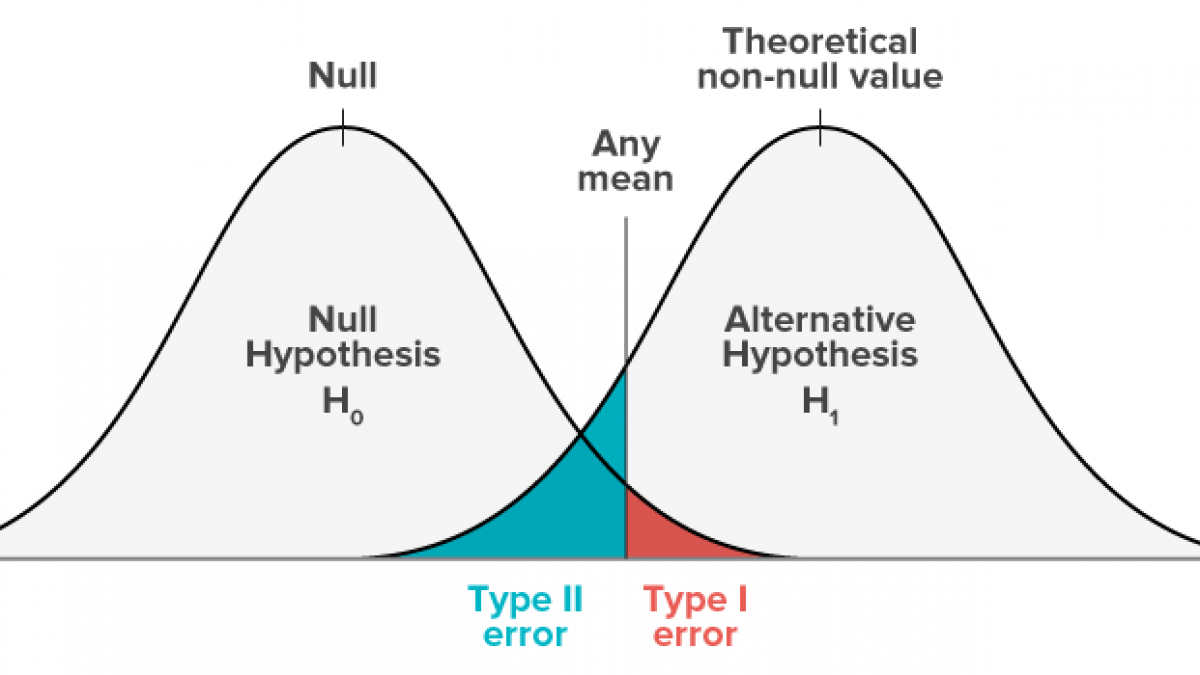

- Let's ignore the H1 graph on the right first
    - Type 1 error is simply the $\alpha$ we discussed above
    - When the null hypothesis is true, and we reject everything that falls to the right of some cutoff $\alpha$ (the vertical line that says `Any mean`), then that is the proportion of cases that we will wrongly reject the null

- Now, we want to know the proportion of cases where non-rejection of null can be a mistake
    - Again, look at the vertical line that says `Any mean`
    - Any Z value to the left of that line, we conclude that the null is not rejected
    - However, in the case that the mean of the sample is truly different, it is still possible for the Z value to fall to the left of the vertical line! 
    - This is denoted by the blue region
    - Hence, in such cases, we will wrongly conclude that the null is not rejected, when it should be

- So in conclusion, there are 2 ways for the z-test to be wrong
    - $\alpha$ only addresses 1 possible way
    - And so it's not correct to say that your test has $\alpha$ probability of being wrong 

## Example

- Problem
    - I want to fill tubs of face powder with 4 gm on average and standard deviation 1 gm
    - A quality inspector takes a random sample of nine tubs and weighs the powder in each. 
    - The average weight of powder is 4.6 gm. 

- Question
    - Am I at risk of over-filling?
    - Am I at risk of under-filling?
    - Am I at risk of either over or under filling?

In [2]:
mu = 4
sigma = 1
xbar = 4.6
n=9

def zscore(mu, sigma, xbar, n):
    return (xbar - mu) / (sigma / n**0.5)

zscore(mu, sigma, xbar, n)

1.799999999999999

- Since Zscore is 1.8
    - Overfilling: 1.8 > 1.645 critical value, so reject null that mean is 4gm; it is likely above
    - Underfilling: 1.8 > -1.645 critical value, so do not reject null that mean is 4gm
    - Over/Under filling: -1.96 < 1.8 < 1.96, so do not rejection of null that mean is 4gm